In [1]:

import os, warnings
import numpy as np
import PIL.Image as Image
#import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from colorama import Fore
from fastai.vision.all import *
from fastai.metrics import accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import pathlib, os, torch, gc
import matplotlib.pyplot as plt
from fastai.vision.models import resnet50
from fastai.metrics import error_rate, accuracy
from fastai.vision.all import *


In [2]:

Image.MAX_IMAGE_PIXELS = 933120000 # Change the max pixels to avoid warnings
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [3]:

'''
trainPath = directory containing the train set
valid_pct = Percent of data used for validation set
bs = batch size
get_items = Function used extract the train set
get_y = Function used to classify the train set
item_tfms = Transforms to be performed on all of the data
batch_tfms = Transforms to be performed on each batch
'''

def loadData(trainPath, valid_pct, bs=None, get_items=get_image_files, get_y=parent_label, 
             item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'), batch_tfms=aug_transforms()):
    
    # parent_label --> simply gets the name of the folder a file is in
    
    loader = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_items,
        splitter = RandomSplitter(valid_pct=valid_pct, seed=24),
        get_y = get_y,
        item_tfms = item_tfms,
        batch_tfms = batch_tfms
    )
    dls = loader.dataloaders(trainPath, bs=bs)
    return dls


In [4]:

trainPath = 'FruitsAdversarialML/'

dls = loadData(trainPath, valid_pct=0.2, bs=8, get_y=parent_label)


/home/maquina1/anaconda3/envs/fastaiTorch/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


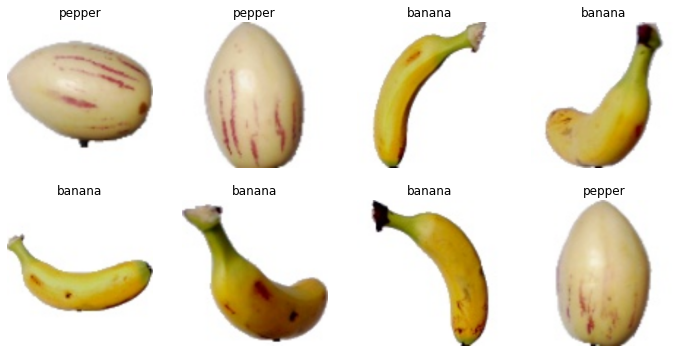

In [5]:

dls.valid.show_batch(max_n=8, nrows=2)

plt.show()


In [6]:

'''
dls  = Fastai DataLoaders object
arch = Architecture, e.g. resnet50
path = Path to where the trained model should be exported
epoch_ct = Number of iterations
metrics = Metrics to print while training
pretrained = Whether or not to use a pretrained model (False = Create model from scratch)
'''


def trainModel(dls, arch, path, epoch_ct=1, metrics=[error_rate, accuracy], pretrained=True):
    
    model   = cnn_learner(dls, arch, metrics=metrics, pretrained=pretrained)
    base_lr = model.lr_find()[0]
    
    model.fine_tune(epochs=epoch_ct, base_lr = base_lr)
    model.dls.train = dls.train
    model.dls.valid = dls.valid
    model.export(path)
    return model 


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.134938,0.000711,0.000000,1.000000,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.073378,0.000487,0.000000,1.000000,00:05
1,0.062273,0.000229,0.000000,1.000000,00:05
2,0.159921,0.000122,0.000000,1.000000,00:05
3,0.090475,0.000005,0.000000,1.000000,00:05
4,0.096305,0.000205,0.000000,1.000000,00:05
5,0.060846,0.000037,0.000000,1.000000,00:05
6,0.041686,0.000001,0.000000,1.000000,00:05
7,0.013520,0.000000,0.000000,1.000000,00:05
8,0.028297,0.000000,0.000000,1.000000,00:05
9,0.017741,0.000003,0.000000,1.000000,00:05


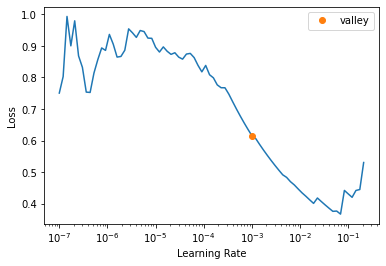

In [7]:

exportPath = './bestModelAdv.pkl'

model = trainModel(dls, resnet50, path=exportPath, epoch_ct=10, metrics=[error_rate, accuracy], pretrained=True)


In [9]:

def confusionMatrix(isModel, model=None, y_true=None, y_pred=None, pos_label=None, neg_label=None):
    if(isModel):
        interp = ClassificationInterpretation.from_learner(model)
        interp.plot_confusion_matrix()
        plt.show()
    else:
        conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
        fig, ax = plt.subplots(figsize=(7, 5.5))
        ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        ax.set_xticklabels([0, neg_label, pos_label])
        ax.set_yticklabels([0, neg_label, pos_label])
        plt.show()


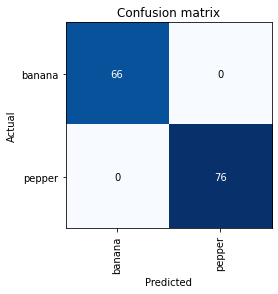

In [10]:

confusionMatrix(isModel=True, model=model)


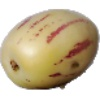

In [11]:

second_img = 'FruitsAdversarialML/pepper/r_117_100.jpg'
img = PILImage.create( second_img )
img


In [12]:

the_class, _, probs = model.predict(img)
print(the_class)

print(probs)


pepper
TensorBase([6.9019e-11, 1.0000e+00])


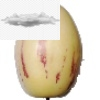

In [17]:



second_img = 'GenAdversarialImages/pepper/284_100.jpg'
img = PILImage.create( second_img )
img


In [18]:

the_class, _, probs = model.predict(img)
print(the_class)

print(probs)


pepper
TensorBase([0.0013, 0.9987])


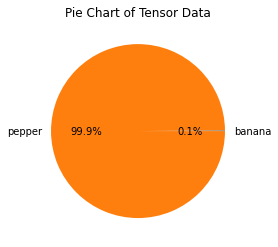

In [27]:

## import torch
import matplotlib.pyplot as plt

# Create a tensor

tensor_data = torch.tensor([10, 20])
tensor_data = probs

# Convert tensor to NumPy array
np_data = tensor_data.numpy()

# Create pie chart
plt.pie(np_data, labels=['banana', 'pepper'], autopct='%1.1f%%')
plt.title("Pie Chart of Tensor Data")
plt.show()



## Gen adversarial Images


In [21]:

mypath = "FruitsAdversarialML/"
ras5 = [os.path.join(dirpath,f) for (dirpath, dirnames, filenames) in os.walk(mypath) for f in filenames] 
print( ras5 )


['FruitsAdversarialML/pepper/163_100.jpg', 'FruitsAdversarialML/pepper/154_100.jpg', 'FruitsAdversarialML/pepper/180_100.jpg', 'FruitsAdversarialML/pepper/195_100.jpg', 'FruitsAdversarialML/pepper/161_100.jpg', 'FruitsAdversarialML/pepper/r_24_100.jpg', 'FruitsAdversarialML/pepper/26_100.jpg', 'FruitsAdversarialML/pepper/152_100.jpg', 'FruitsAdversarialML/pepper/234_100.jpg', 'FruitsAdversarialML/pepper/226_100.jpg', 'FruitsAdversarialML/pepper/r_119_100.jpg', 'FruitsAdversarialML/pepper/311_100.jpg', 'FruitsAdversarialML/pepper/5_100.jpg', 'FruitsAdversarialML/pepper/141_100.jpg', 'FruitsAdversarialML/pepper/129_100.jpg', 'FruitsAdversarialML/pepper/280_100.jpg', 'FruitsAdversarialML/pepper/r_26_100.jpg', 'FruitsAdversarialML/pepper/165_100.jpg', 'FruitsAdversarialML/pepper/r_79_100.jpg', 'FruitsAdversarialML/pepper/0_100.jpg', 'FruitsAdversarialML/pepper/r_87_100.jpg', 'FruitsAdversarialML/pepper/r_66_100.jpg', 'FruitsAdversarialML/pepper/300_100.jpg', 'FruitsAdversarialML/pepper/176

In [22]:

## original_img.paste(img_to_add, (100, 50), mask=img_to_add)

for thing in ras5:
    original_img  = Image.open(thing)
    img_to_add    = Image.open('cloud4_no.png')
    img_to_add    = img_to_add.resize((60,40)) 
    original_img.paste(img_to_add, mask=img_to_add)
    temp = thing.split("/")
    new_file_name = 'GenAdversarialImages/' + temp[1] + "/" + temp[2]
    print(new_file_name)
    original_img.save(new_file_name, quality=99)



GenAdversarialImages/pepper/163_100.jpg
GenAdversarialImages/pepper/154_100.jpg
GenAdversarialImages/pepper/180_100.jpg
GenAdversarialImages/pepper/195_100.jpg
GenAdversarialImages/pepper/161_100.jpg
GenAdversarialImages/pepper/r_24_100.jpg
GenAdversarialImages/pepper/26_100.jpg
GenAdversarialImages/pepper/152_100.jpg
GenAdversarialImages/pepper/234_100.jpg
GenAdversarialImages/pepper/226_100.jpg
GenAdversarialImages/pepper/r_119_100.jpg
GenAdversarialImages/pepper/311_100.jpg
GenAdversarialImages/pepper/5_100.jpg
GenAdversarialImages/pepper/141_100.jpg
GenAdversarialImages/pepper/129_100.jpg
GenAdversarialImages/pepper/280_100.jpg
GenAdversarialImages/pepper/r_26_100.jpg
GenAdversarialImages/pepper/165_100.jpg
GenAdversarialImages/pepper/r_79_100.jpg
GenAdversarialImages/pepper/0_100.jpg
GenAdversarialImages/pepper/r_87_100.jpg
GenAdversarialImages/pepper/r_66_100.jpg
GenAdversarialImages/pepper/300_100.jpg
GenAdversarialImages/pepper/176_100.jpg
GenAdversarialImages/pepper/r_49_100.j

GenAdversarialImages/pepper/106_100.jpg
GenAdversarialImages/pepper/r_15_100.jpg
GenAdversarialImages/pepper/240_100.jpg
GenAdversarialImages/pepper/281_100.jpg
GenAdversarialImages/pepper/34_100.jpg
GenAdversarialImages/pepper/r_103_100.jpg
GenAdversarialImages/pepper/315_100.jpg
GenAdversarialImages/pepper/228_100.jpg
GenAdversarialImages/pepper/269_100.jpg
GenAdversarialImages/pepper/191_100.jpg
GenAdversarialImages/pepper/263_100.jpg
GenAdversarialImages/pepper/293_100.jpg
GenAdversarialImages/pepper/115_100.jpg
GenAdversarialImages/pepper/r_21_100.jpg
GenAdversarialImages/pepper/199_100.jpg
GenAdversarialImages/pepper/289_100.jpg
GenAdversarialImages/pepper/17_100.jpg
GenAdversarialImages/pepper/33_100.jpg
GenAdversarialImages/pepper/160_100.jpg
GenAdversarialImages/pepper/r_96_100.jpg
GenAdversarialImages/pepper/114_100.jpg
GenAdversarialImages/pepper/227_100.jpg
GenAdversarialImages/pepper/29_100.jpg
GenAdversarialImages/pepper/r_63_100.jpg
GenAdversarialImages/pepper/288_100.jp

GenAdversarialImages/banana/7_100.jpg
GenAdversarialImages/banana/20_100.jpg
GenAdversarialImages/banana/4_100.jpg
GenAdversarialImages/banana/r2_55_100.jpg
GenAdversarialImages/banana/109_100.jpg
GenAdversarialImages/banana/r2_117_100.jpg
GenAdversarialImages/banana/171_100.jpg
GenAdversarialImages/banana/r2_19_100.jpg
GenAdversarialImages/banana/r2_37_100.jpg
GenAdversarialImages/banana/175_100.jpg
GenAdversarialImages/banana/12_100.jpg
GenAdversarialImages/banana/r2_4_100.jpg
GenAdversarialImages/banana/r_57_100.jpg
GenAdversarialImages/banana/r2_61_100.jpg
GenAdversarialImages/banana/194_100.jpg
GenAdversarialImages/banana/r2_97_100.jpg
GenAdversarialImages/banana/r2_170_100.jpg
GenAdversarialImages/banana/110_100.jpg
GenAdversarialImages/banana/85_100.jpg
GenAdversarialImages/banana/66_100.jpg
GenAdversarialImages/banana/121_100.jpg
GenAdversarialImages/banana/r_56_100.jpg
GenAdversarialImages/banana/r_40_100.jpg
GenAdversarialImages/banana/r2_36_100.jpg
GenAdversarialImages/banan

GenAdversarialImages/banana/r2_32_100.jpg
GenAdversarialImages/banana/21_100.jpg
GenAdversarialImages/banana/r2_162_100.jpg
GenAdversarialImages/banana/15_100.jpg
GenAdversarialImages/banana/r2_78_100.jpg
GenAdversarialImages/banana/105_100.jpg
GenAdversarialImages/banana/r_4_100.jpg
GenAdversarialImages/banana/25_100.jpg
GenAdversarialImages/banana/r2_112_100.jpg
GenAdversarialImages/banana/r2_69_100.jpg
GenAdversarialImages/banana/99_100.jpg
GenAdversarialImages/banana/r2_80_100.jpg
GenAdversarialImages/banana/193_100.jpg
GenAdversarialImages/banana/69_100.jpg
GenAdversarialImages/banana/r2_20_100.jpg
GenAdversarialImages/banana/r2_17_100.jpg
GenAdversarialImages/banana/r2_136_100.jpg
GenAdversarialImages/banana/r2_171_100.jpg
GenAdversarialImages/banana/186_100.jpg
GenAdversarialImages/banana/10_100.jpg
GenAdversarialImages/banana/r_22_100.jpg
GenAdversarialImages/banana/r2_169_100.jpg
GenAdversarialImages/banana/r_14_100.jpg
GenAdversarialImages/banana/r2_119_100.jpg
GenAdversarial

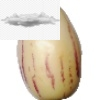

In [23]:

img_to_add    = Image.open("GenAdversarialImages/pepper/203_100.jpg")
img_to_add



## Training after Adversarial Attack


In [28]:

trainPath = 'AttackedDataset/'

dls = loadData(trainPath, valid_pct=0.2, bs=8, get_y=parent_label)


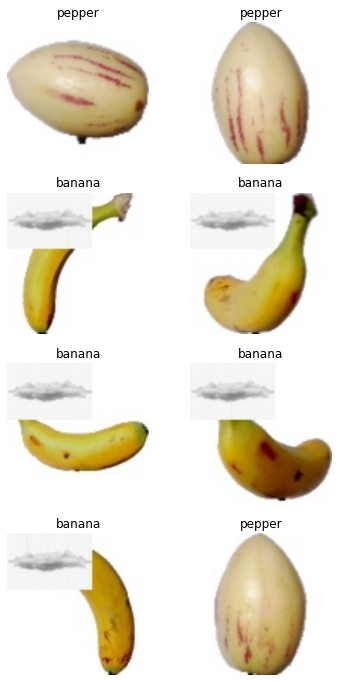

In [29]:

dls.valid.show_batch(max_n=24, nrows=4)

plt.show()


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.079717,0.002158,0.000000,1.000000,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.143799,0.041703,0.021127,0.978873,00:05
1,0.142231,0.000009,0.000000,1.000000,00:05
2,0.089297,0.000005,0.000000,1.000000,00:05
3,0.103516,0.000001,0.000000,1.000000,00:05
4,0.103702,0.000109,0.000000,1.000000,00:05
5,0.053621,0.002656,0.000000,1.000000,00:05
6,0.027033,0.000020,0.000000,1.000000,00:05
7,0.082771,0.000080,0.000000,1.000000,00:05
8,0.128115,0.000031,0.000000,1.000000,00:05
9,0.113393,0.000019,0.000000,1.000000,00:05


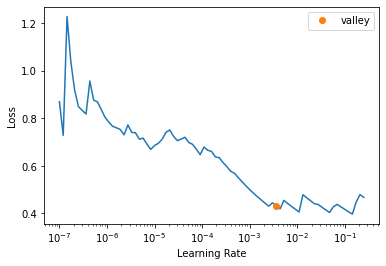

In [30]:

exportPath = './bestModelAdvAttacked.pkl'

model = trainModel(dls, resnet50, path=exportPath, epoch_ct=10, metrics=[error_rate, accuracy], pretrained=True)


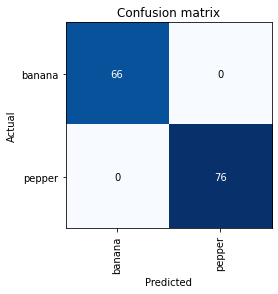

In [31]:

confusionMatrix(isModel=True, model=model)


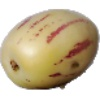

In [32]:

second_img = 'FruitsAdversarialML/pepper/r_117_100.jpg'
img = PILImage.create( second_img )
img


In [33]:

the_class, _, probs = model.predict(img)
print(the_class)

print(probs)


pepper
TensorBase([2.5284e-08, 1.0000e+00])


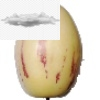

In [34]:

second_img = 'GenAdversarialImages/pepper/284_100.jpg'
img = PILImage.create( second_img )
img


In [35]:

the_class, _, probs = model.predict(img)
print(the_class)

print(probs)


banana
TensorBase([9.9975e-01, 2.5110e-04])


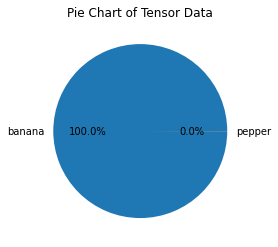

In [36]:

## import torch
import matplotlib.pyplot as plt

# Create a tensor

tensor_data = torch.tensor([10, 20])
tensor_data = probs

# Convert tensor to NumPy array
np_data = tensor_data.numpy()

# Create pie chart
plt.pie(np_data, labels=['banana', 'pepper'], autopct='%1.1f%%')
plt.title("Pie Chart of Tensor Data")
plt.show()
